In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib. pyplot as plt
%matplotlib inline

In [2]:
# Read data set into python environment
data=pd.read_excel(r'C:\Users\jibin\Downloads\iris.xls')


In [3]:
data.head() # check the first few lines of the data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Basic things

In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.ndim

2

In [11]:
# Pre-processing

In [12]:
# missing value handling

In [13]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [14]:
# missing values in the 'SL', 'SW', 'PL'-columns. 
num_miss_col=data[['SL', 'SW', 'PL']]

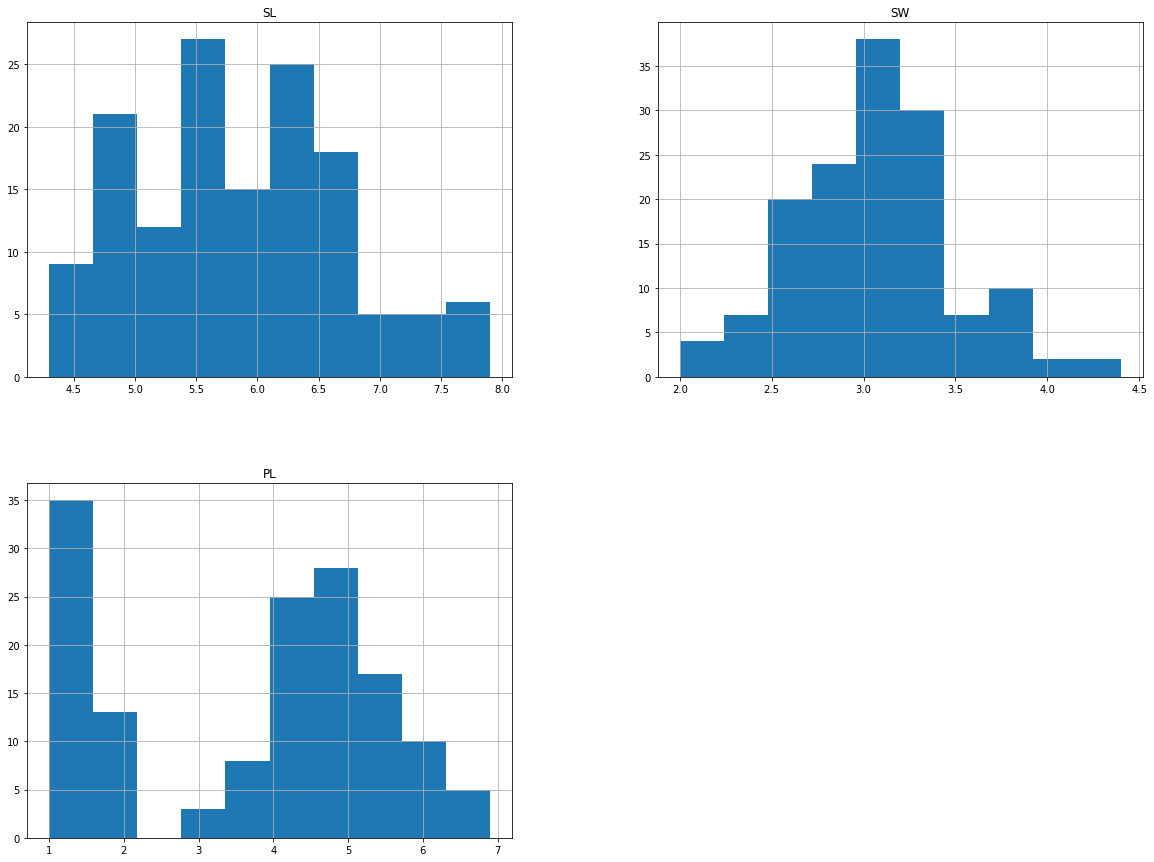

In [15]:
# Plotting to know how to fill the mising data
freqgraph=num_miss_col.select_dtypes(include=['float']) # data is normally distributed,hence the missing values are filled-mean
freqgraph.hist(figsize=(20,15))
plt.show();

In [16]:
# filling missing value using mean
for col in ['SL','SW','PL']:
    num_miss_col[col]= num_miss_col[col].fillna(data[col].mean()) 

C:\Users\jibin\AppData\Local\Temp\ipykernel_8304\4060319131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_miss_col[col]= num_miss_col[col].fillna(data[col].mean())


In [17]:
num_miss_col.isna().sum()

SL    0
SW    0
PL    0
dtype: int64

In [18]:
num_col=data['PW']

In [19]:
num_cols=pd.concat([num_miss_col, num_col],axis=1) # numeric columns creation

In [20]:
num_cols

,SL,SW,PL,PW
0,5.100000,3.5,1.40000,0.2
1,4.900000,3.0,1.40000,0.2
2,5.855944,3.2,1.30000,0.2
3,4.600000,3.1,1.50000,0.2
4,5.000000,3.6,1.40000,0.2
...,...,...,...,...
145,6.700000,3.0,5.20000,2.3
146,6.300000,2.5,5.00000,1.9
147,6.500000,3.0,3.75625,2.0
148,6.200000,3.4,5.40000,2.3


In [21]:
data=data.drop(['SL', 'SW', 'PL', 'PW'], axis=1)

In [22]:
data

,Classification
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [23]:
data=pd.concat([num_cols,data],axis=1)

In [24]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


In [25]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [26]:
data['Classification'].nunique() # checking for unique values

3

In [27]:
data['Classification'].value_counts() 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

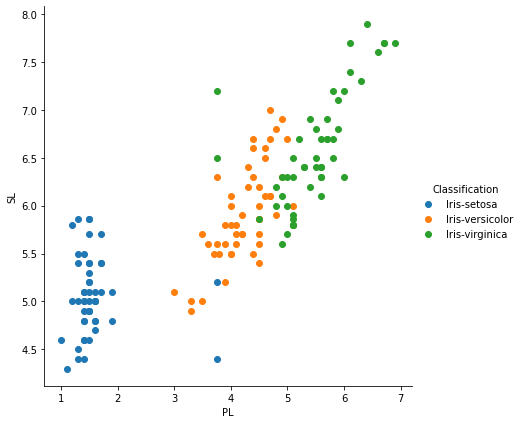

In [28]:
sns.FacetGrid(data,hue='Classification',height=6).map(plt.scatter,'PL','SL').add_legend();
# scatter plot understanding distribution of data

In [29]:
cla_types={'Iris-setosa':0 ,'Iris-versicolor':1 ,'Iris-virginica':2 } # encoding to number
data['Classification']=data['Classification'].map(cla_types)

In [30]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [31]:
# split to target and features
x=data.drop('Classification',axis=1)
y=data['Classification']

In [32]:
# further split into train, test, split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
# logistic regression model

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logit_model=LogisticRegression()
logt_model=logit_model.fit(x_train,y_train)
y_pred_logit=logt_model.predict(x_test)

In [36]:
y_pred_logit

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test, y_pred_logit)
# no misclassification


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [39]:
from sklearn.metrics import precision_score, recall_score 

In [40]:
precision_score(y_test,y_pred_logit,average='micro')

1.0

In [41]:
precision_score(y_test,y_pred_logit,average='macro')

1.0

In [42]:
precision_score(y_test,y_pred_logit,average='weighted')

1.0

In [43]:
recall_score(y_test,y_pred_logit,average='micro')

1.0

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test, y_pred_logit)

1.0

In [46]:
## kNN model
from sklearn.neighbors import KNeighborsClassifier

In [47]:
metric_k=[] # create an empty list
neighbors=range(3, 18) # taken some values from 3 to 17,can take any value
 
for k in neighbors:       # iterate through each value in neighbour
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(x_train,y_train)
    y_pred_kNN=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

In [48]:
   metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

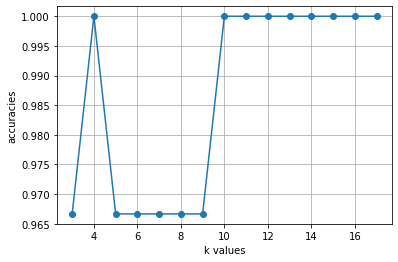

In [49]:
plt.plot(neighbors,metric_k,'o-') 
plt.xlabel('k values')
plt.ylabel('accuracies')  # from this can identfy which k value has highest accuracy
plt.grid()                

In [50]:
# taking k=4 
classifier=KNeighborsClassifier(n_neighbors=4)
classifier=classifier.fit(x_train,y_train)
y_pred_kNN=classifier.predict(x_test)

In [51]:
accuracy_score(y_test, y_pred_kNN) 

1.0

In [52]:
precision_score(y_test,y_pred_kNN,average='micro')

1.0

In [53]:
precision_score(y_test,y_pred_kNN,average='macro')

1.0

In [54]:
precision_score(y_test,y_pred_kNN,average='weighted')

1.0

In [55]:
precision_score(y_test,y_pred_kNN,average=None)

array([1., 1., 1.])

In [56]:
recall_score(y_test,y_pred_kNN,average=None)

array([1., 1., 1.])

In [57]:
confusion_matrix(y_test, y_pred_kNN) 

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [58]:
# taking k=10
classifier=KNeighborsClassifier(n_neighbors=10)
classifier=classifier.fit(x_train,y_train)
y_pred_kNN=classifier.predict(x_test)

In [59]:
accuracy_score(y_test, y_pred_kNN) 

1.0

In [60]:
precision_score(y_test,y_pred_kNN,average='micro')

1.0

In [61]:
precision_score(y_test,y_pred_kNN,average='macro')

1.0

In [62]:
precision_score(y_test,y_pred_kNN,average='weighted')

1.0

In [63]:
precision_score(y_test,y_pred_kNN,average=None)

array([1., 1., 1.])

In [64]:
recall_score(y_test,y_pred_kNN,average=None)

array([1., 1., 1.])

In [65]:
confusion_matrix(y_test, y_pred_kNN) 

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [66]:
# SVM model

In [67]:
from sklearn.svm import SVC

In [68]:
clf_svm=SVC(kernel='linear') 
clf_svm=clf_svm.fit(x_train,y_train) 
y_pred_svm=clf_svm.predict(x_test)

In [69]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [70]:
accuracy_score(y_test,y_pred_svm)

1.0

In [71]:
clf_svm2=SVC(kernel='rbf')
clf_svm2=clf_svm.fit(x_train,y_train)
y_pred_svm2=clf_svm2.predict(x_test)

In [72]:
confusion_matrix(y_test,y_pred_svm2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [73]:
accuracy_score(y_test,y_pred_svm2)

1.0

In [74]:
# Decision tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(x_train, y_train)
y_pred_dt=dt_clf.predict(x_test)

In [77]:
confusion_matrix(y_test,y_pred_dt) 


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [78]:
accuracy_score(y_test,y_pred_dt)

1.0

In [79]:
# Random Forest Algorithm 

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(x_train, y_train)
y_pred_rf=rf_clf.predict(x_test)

In [82]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [83]:
accuracy_score(y_test,y_pred_rf) # 0.90

1.0

In [84]:
# in each and every model the output are similar.Accuracy, Precision,recall on each and every model is same i.e 1.